# The Titanic
The following code will analyze and visualize some data about the tragedy of the titanic

Note: I haven't isolated each cell completely and they are often dependent on each other, so it may complain if you don't run some cells sequentially

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.nonparametric
import warnings
import sklearn
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


#I probably could have done this better

In [5]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Cleaning the data

In [6]:
df = df.drop(['Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df = df.dropna()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


With pandas, you can loop over the observations like a list

In [23]:
def nonNumerical(df):
    columns = df.columns.values
    for i in columns:
        textDigitValues = {}
        def intConvert(val):
            return textDigitValues[val]
        if df[i].dtype != np.int64 and df[i].dtype != np.float64:
            columnContents = df[column].values.tolist()
            uniqueElements = set(columnContents)
            x = 0
            for unique in uniqueElements:
                if unique not in textDigitValues:
                    textDigitValues[unique] = x
                    x = x + 1
                    
            df[column] = list(map(intConvert, df[i]))
            
    return df

df = nonNumerical(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,201,0,22.0,1,0,7.2500,1
1,2,1,1,600,1,38.0,1,0,71.2833,2
2,3,1,3,340,1,26.0,0,0,7.9250,1
3,4,1,1,214,1,35.0,1,0,53.1000,1
4,5,0,3,573,0,35.0,0,0,8.0500,1
6,7,0,1,72,0,54.0,0,0,51.8625,1
7,8,0,3,220,0,2.0,3,1,21.0750,1
8,9,1,3,249,1,27.0,0,2,11.1333,1
9,10,1,2,513,1,14.0,1,0,30.0708,2
10,11,1,3,471,1,4.0,1,1,16.7000,1


# Some Visualizations

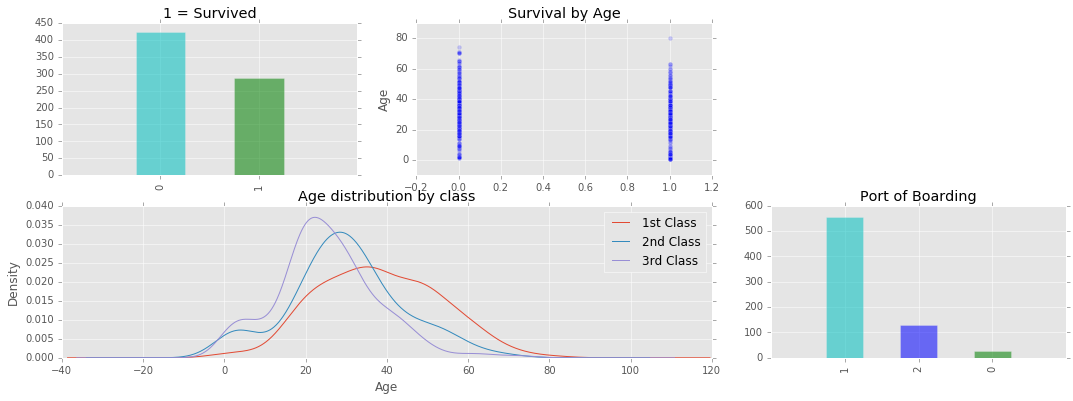

In [64]:
fig = plt.figure(figsize = (18,6), dpi = 1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
#can plot many different graphs together
axl = plt.subplot2grid((2,3),(0,0))
#bar chart survival
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart, colors=['c','g'])
#margin formatting
axl.set_xlim(-1, 2)
plt.title('1 = Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age")

plt.subplot2grid((2,3),(1,0), colspan=2)
#kernel density estimate of age
df.Age[df.Pclass==1].plot(kind='kde')
df.Age[df.Pclass==2].plot(kind='kde')
df.Age[df.Pclass==3].plot(kind='kde')
#axis label
plt.xlabel('Age')
plt.title('Age distribution by class')
#legend
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc ='best')

ax5=plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar',alpha=alpha_bar_chart, colors=['c','b','g'])
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title('Port of Boarding')
#C = Cherbourg; Q = Queenstown; S = Southampton

In [122]:
ExpensiveSurvive = sum(df.Survived[df['Fare']>80])
ExpensiveDead = len(df.Survived[df['Fare']>80]) - sum(df.Survived[df['Fare']>80])
CheapSurvive = sum(df.Survived[df['Fare']<20])
CheapDead = len(df.Survived[df['Fare']<20]) - sum(df.Survived[df['Fare']<20])

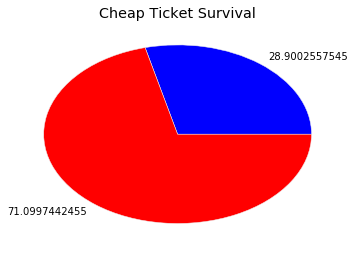

In [127]:
slices = [(CheapSurvive),(CheapDead)]
plt.pie(slices, labels=[(100*CheapSurvive/(CheapDead+CheapSurvive+0.0)),(100*CheapDead/(CheapDead+CheapSurvive+0.0))], colors=['b','r'])
plt.title('Cheap Ticket Survival')

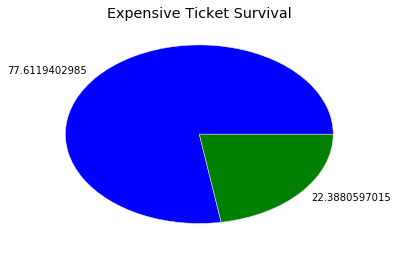

In [121]:
slices = [(ExpensiveSurvive),(ExpensiveDead)]
plt.pie(slices, labels=[(100*ExpensiveSurvive/(ExpensiveDead+ExpensiveSurvive+0.0)),(100*ExpensiveDead/(ExpensiveDead+ExpensiveSurvive+0.0))])
plt.title('Expensive Ticket Survival')

In [195]:
bins = [10*i for i in range(10)]
#plt.hist(df.Fare, bins, histtype = 'bar', rwidth=.8)

#plt.hist(df.Survived[df['Fare'] < 20])
#plt.hist(df.Survived[df['Fare'] > 80])

#plt.hist(df.Survived[df['Fare']*df['Sex'] == 0])

#plt.xlabel('Sex')
#plt.ylabel('Survived')

# Starting Machine Learning: Clustering

Below is an example of how clustering can be used on simple arrays

[[ 2.88017871  9.86409014  9.98167568]
 [ 5.09000163  5.05720777  4.8322288 ]
 [ 0.91776157  1.00058366  1.16504583]]
Number of estimated clusters: 3


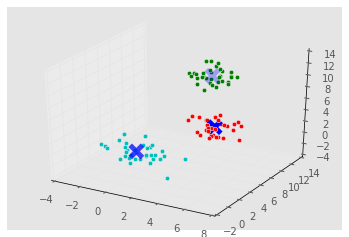

In [205]:

centers = [[1,1,1],[5,5,5],[3,10,10]]
x, _= make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print cluster_centers
n_clusters_ = len(np.unique(labels))
print "Number of estimated clusters:", n_clusters_

colors = 10*['g','r','c','k','o']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(x)):
    ax.scatter(x[i][0], x[i][1], x[i][2], c=colors[labels[i]], marker ='o')
    
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
           marker='x', color='k', s=150, linewidths=5, zorder=10)

plt.show()

In [71]:
x = np.array(df.drop(['Survived'], 1).astype(float))
x = preprocessing.scale(x)
y = np.array(df['Survived'])
clf = MeanShift()
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [72]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

amount_correct = (correct - 0.0)/len(x)
print max(amount_correct, 1 - amount_correct)

0.601123595506


In [73]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

results = {}
y,x = dmatrices(formula, data=df, return_type='dataframe')

model = sm.Logit(y,x)
res = model.fit()

results['Logit']=[res,formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 Jul 2016   Pseudo R-squ.:                  0.3416
Time:                        14:32:34   Log-Likelihood:                -316.34
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 3.985e-66
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.0847      0.678      1.600      0.110        -0.244     2.414
C(Pclass)[T.2]      -1.2684      0.298     -4.250      0.000        -1.853    -0.683
C(Pclass)[T.3]      -2.4938      0.296     -8.419      0.000        -3.074    -1.913
C(Sex)[T.1]          2.6411      0.223     11.854      0.000         2.204     3.078
C(Embarked)[T.1]     0.4168      0.556      0.749      0.454        -0.674     1.507
C(Embarked)[T.2]     0.8445      0.599      1.410      0.159        -0.330     2.019
Age                 -0.0437      0.008     -5.272      0.000        -0.060    -0.027
SibSp               -0.3558      0.129     -2.768      0.006        -0.608    -0.104
Parch               -0.0446      0.121     -0.370      0.712        -0.281     0.192
====================================================================================
"""

In [52]:
test = pd.read_csv("test.csv")

# Decision Tree

In [51]:
target = df["Survived"].values
features_one = df[["Pclass", "Sex", "Age", "Fare"]].values
tree1 = tree.DecisionTreeClassifier()
tree1 = tree1.fit(features_one, target)

print(tree1.feature_importances_)

[ 0.13991061  0.29825752  0.24488245  0.31694943]


# Random Forest

In [74]:
y, x = dmatrices(formula, data=df, return_type='dataframe')
#convert to 1d array
y = np.asarray(y).ravel()

results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

score = results_rf.score(x, y)
print "Score: {0}".format(score)

Score: 0.945224719101
